# Milestone 1 - EDA and Preprocessing data 

***Important note*** - This is merely a template. you are more than free to change how it looks or create one from scratch.

- Load dataset
- Explore the dataset and ask atleast 5 questions to give you a better understanding of the data provided to you. 
- Visualise the answer to these 5 questions.
- Cleaning the data
    - Tidy up the column names, make sure there is no spaces
    - Observe,comment on and handle inconsistent data.(i.e duplicates, irrelevant data,incorrect data,etc)
    - Observe missing data and comment on why you believe it is missing(MCAR,MAR or MNAR).
    - Handle missing data
    - Observe and comment on outliers
    - Handle outliers
- With every change you are making to the data you need to comment on why you used this technique and how has it affected the data(by both showing the change in the data i.e change in number of rows/columns,change in distrubution, etc and commenting on it).
- Data transformation and feature engineering
    - Add 2 new columns named 'Week number' and 'Date range' and discretize the data into weeks according to the dates. 
        - Tip: Change the datatype of the date feature to datetime type instead of object.
    - Encode any categorical feature(s) and comment on why you used this technique and how the data has changed.
    - If exists , Identify feature(s) which need normalization and show your reasoning. Then choose a technique to normalize the feature(s) and comment on why you chose this technique.
- Additional data extraction
    - Add GPS coordinates for the cities/locations.
    - For this task you can extract the GPS coordinates from an API or web scraping and integrate into your csv file as new features. 
    - Tip 1 - you can find the web scraping and data integration notebooks under 'additional resources'  on the CMS useful.
    - Tip 2 - If you are going to use an API make sure you do not make request for each existing row but rather group by the cities and get their respective coordinates. Making a request for each row is too inefficient and expensive.
    - Tip 3 - Rather than running the code for calling the API each time you load the notebook, the first time you call the API save the results in a csv file and then you could you check if a csv file exists for the GPS coordinates, if so, load directly and don't call APi. Same applies for web scraping.

- Lookup table and load back into new csv file
    - Create a lookup table
    - Load the new dataset into a new csv file named `green_trip_data_{year}-{month}clean.csv`. replace year and month with the appropriate values.
    - Load the lookup table to a csv file called `lookup_table_green_taxis.csv` 
- Bonus: Load the dataset as a parquet file instead of a csv file(Parquet file is a compressed file format).

# EDA

In [262]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math


In [160]:
def load_dataset(path, file_name):
    return pd.read_csv(path + file_name)

In [322]:
taxis_df = load_dataset('./','green_tripdata_2015-04.csv')

In [162]:
taxis_df.head(10)

,Vendor,lpep pickup datetime,lpep dropoff datetime,store and fwd flag,Rate type,PU Location,DO Location,passenger count,trip distance,fare amount,extra,mta tax,tip amount,tolls amount,ehail fee,improvement surcharge,total amount,payment type,trip type,congestion surcharge
0,"Creative Mobile Technologies, LLC",2015-04-01 00:26:00,2015-04-01 00:27:14,N,Standard rate,"Queens,Long Island City/Hunters Point","Queens,Long Island City/Hunters Point",1.0,8.30,3.0,0.5,0.5,0.00,0.0,NaN,0.3,4.30,Cash,Street-hail,NaN
1,VeriFone Inc.,2015-04-01 00:17:41,2015-04-01 00:19:45,N,Standard rate,"Queens,Long Island City/Queens Plaza","Queens,Long Island City/Queens Plaza",1.0,0.00,3.5,0.5,0.5,0.00,0.0,NaN,0.3,4.80,Cash,Street-hail,NaN
2,VeriFone Inc.,2015-04-01 00:01:25,2015-04-01 00:11:22,N,Standard rate,"Brooklyn,Williamsburg (North Side)","Manhattan,Alphabet City",1.0,2.41,10.0,0.5,0.5,2.26,0.0,NaN,0.3,13.56,Credit card,Street-hail,NaN
3,VeriFone Inc.,2015-04-01 00:30:16,2015-04-01 00:55:27,N,Standard rate,"Brooklyn,Williamsburg (North Side)","Manhattan,Times Sq/Theatre District",1.0,6.17,21.5,0.5,0.5,4.56,0.0,NaN,0.3,27.36,Credit card,Street-hail,NaN
4,VeriFone Inc.,2015-04-01 00:19:05,2015-04-01 00:39:33,N,Standard rate,"Brooklyn,East Williamsburg","Manhattan,Clinton East",1.0,6.51,21.0,0.5,0.5,3.00,0.0,NaN,0.3,25.30,Credit card,Street-hail,NaN
5,VeriFone Inc.,2015-04-01 00:05:52,2015-04-01 00:09:42,N,Standard rate,"Brooklyn,Bedford","Brooklyn,Stuyvesant Heights",1.0,0.90,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,Cash,Street-hail,NaN
6,VeriFone Inc.,2015-04-01 00:14:54,2015-04-01 00:44:42,N,Standard rate,"Brooklyn,Bedford","Brooklyn,Sheepshead Bay",1.0,7.17,24.5,0.5,0.5,0.00,0.0,NaN,0.3,25.80,Cash,Street-hail,NaN
7,VeriFone Inc.,2015-04-01 00:34:17,2015-04-01 00:37:14,N,Standard rate,"Brooklyn,East Williamsburg","Brooklyn,East Williamsburg",1.0,0.65,4.5,0.5,0.5,1.16,0.0,NaN,0.3,6.96,Credit card,Street-hail,NaN
8,"Creative Mobile Technologies, LLC",2015-04-01 00:38:22,2015-04-01 00:40:28,N,Standard rate,"Brooklyn,Fort Greene","Brooklyn,Clinton Hill",1.0,0.70,4.0,0.5,0.5,0.00,0.0,NaN,0.3,5.30,Credit card,Street-hail,NaN
9,"Creative Mobile Technologies, LLC",2015-04-01 00:47:07,2015-04-01 01:07:11,N,Standard rate,"Brooklyn,Williamsburg (South Side)","Brooklyn,Bushwick North",1.0,3.50,15.0,0.5,0.5,0.00,0.0,NaN,0.3,16.30,NaN,Street-hail,NaN


In [98]:
taxis_df.shape

(1664404, 20)

In [6]:
taxis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1664404 entries, 0 to 1664403
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Vendor                 1664404 non-null  object 
 1   lpep pickup datetime   1664404 non-null  object 
 2   lpep dropoff datetime  1664404 non-null  object 
 3   store and fwd flag     1664404 non-null  object 
 4   Rate type              1664404 non-null  object 
 5   PU Location            1664404 non-null  object 
 6   DO Location            1664404 non-null  object 
 7   passenger count        1663734 non-null  float64
 8   trip distance          1664404 non-null  float64
 9   fare amount            1664404 non-null  float64
 10  extra                  924722 non-null   float64
 11  mta tax                1664404 non-null  float64
 12  tip amount             1664404 non-null  float64
 13  tolls amount           1664404 non-null  float64
 14  ehail fee         

#### Observations:
- Table have about 1.6 million rows with 20 columns.
- Some columns do not have a single entry in the table, like ehail free and congestion surcharge.
- Some columns do have null/missing values, such as passenger count, extra and payment type

In [241]:
unique_count = taxis_df.nunique()
unique_count

Vendor                         2
lpep pickup datetime     1155207
lpep dropoff datetime    1153648
store and fwd flag             2
Rate type                      7
PU Location                  243
DO Location                  259
passenger count               10
trip distance               3244
fare amount                 1248
extra                          7
mta tax                        4
tip amount                  2167
tolls amount                 201
ehail fee                      0
improvement surcharge          3
total amount                5947
payment type                   5
trip type                      3
congestion surcharge           0
dtype: int64

We can see that we cannot choose any of the table columns as our index, due to the fact that no column contains a number of unique values which is equal to length of the dataframe (i.e number of the records/rows).

In [247]:
pd.options.display.float_format = '{:.2f}'.format # show values up to 2 decimal places
taxis_df.describe()

,passenger count,trip distance,fare amount,extra,mta tax,tip amount,tolls amount,ehail fee,improvement surcharge,total amount,congestion surcharge
count,1663734.00,1664404.00,1664404.00,924722.00,1664404.00,1664404.00,1664404.00,0.00,1664404.00,1664404.00,0.00
mean,1.38,2.88,12.35,0.65,0.49,1.21,0.11,NaN,0.29,14.81,NaN
std,1.30,2.99,10.84,0.24,0.10,3.62,1.42,NaN,0.05,12.80,NaN
min,1.00,0.00,-499.00,-1.00,-0.50,-52.00,-9.75,NaN,-0.30,-499.00,NaN
25%,1.00,1.07,6.50,0.50,0.50,0.00,0.00,NaN,0.30,7.88,NaN
50%,1.00,1.92,9.50,0.50,0.50,0.00,0.00,NaN,0.30,11.30,NaN
75%,1.00,3.67,15.00,1.00,0.50,1.96,0.00,NaN,0.30,17.80,NaN
max,444.00,375.64,1937.50,16.00,53.54,2017.73,888.88,NaN,0.30,4035.46,NaN


#### Observations:
- For passenger count, the min value is 1, which is expected as each ride should have at least 1 passenger. The maxmium value is 444 which seems very high and might be possibly an outlier or data entry error. The average number is 1.38, indicating that most rides have a few passengers.
- The average trip distance is about 2.88 miles and the min is 0 miles, indicating that some trips might have been very short. The 75th percentile is 3.67 miles which indicates that most trips were somehow relatively short ones.
- The minimum fare amount is -499.0, which is not realistic and might have been an error when entering the data. Similarly, the min for tip amount, tolls amount, extra, mta tax as improvement surcharge are also negative.
- The average toll amount is 0.11 with a maxmium toll of 888.88, which might seem like an outlier.

## Helper Plotting 

In [238]:
def create_bar_plot(series, title, x_label, y_label, figsize=(10,6), palette='Set1', orientation='vertical', color='skyblue'):
    plt.figure(figsize=figsize)
    if orientation == 'vertical':
        plt.bar(series.index, series, color=color)
    else:
        plt.barh(series.index, series, color=color)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

def create_scatter_plot(df, x_col, y_col, title, x_label, y_label, color='skyblue', alpha=0.7):
    plt.scatter(df[x_col], df[y_col], color=color, alpha=alpha)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

def create_line_plot(x_col, y_col, title, x_label, y_label, x_ticks=None, marker='o', color='skyblue', figsize=(10,6)):
    plt.figure(figsize=figsize)
    plt.plot(x_col, y_col, marker=marker, color=color)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)   
    if x_ticks is not None:
        plt.xticks(x_ticks)    
    plt.show()

def create_count_plot(df, x_col, hue_col, title, x_label, y_label, legend_title, palette='Set2', figsize=(10,6)):
    plt.figure(figsize=figsize)
    sns.countplot(x=x_col, hue=hue_col, data=df, palette=palette)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(title=legend_title)
    plt.show()
    
def create_box_plot(df, x_col, title, x_label, color='skyblue', figsize=(10,6)):
    plt.figure(figsize=figsize)
    sns.boxplot(x=x_col, data=df, color=color)
    plt.title(title)
    plt.xlabel(x_label)
    plt.show()

def create_density_plot(data, x_col, title, x_label, figsize=(10, 6)):
    plt.figure(figsize=figsize)
    sns.kdeplot(data[x_col],color='skyblue')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel('Density')
    plt.show()



### What rate types are available and how many trips were completed with each rate type?

In [15]:
rate_counts = taxis_df['Rate type'].value_counts()
rate_counts

Rate type
Standard rate            1616351
Negotiated fare            41159
JFK                         4777
Newark                      1323
Nassau or Westchester        736
Group ride                    56
Unknown                        2
Name: count, dtype: int64

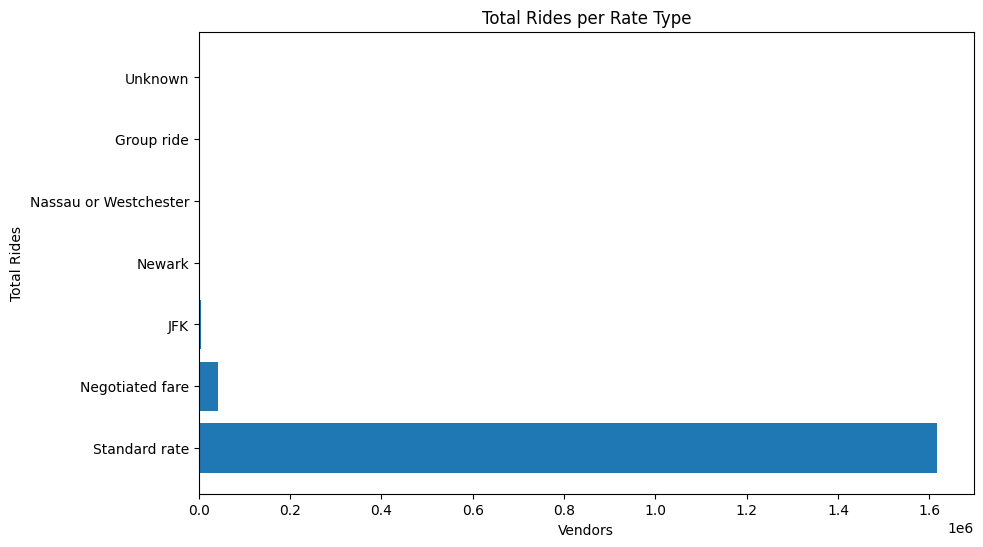

In [226]:
create_bar_plot(rate_counts,'Total Rides per Rate Type', 'Vendors', 'Total Rides', orientation="horizontal")

We can see from this graph that the "Standard Rate" is the most dominant rate type, covering almost all 1.6 million records in our table.

### How many vendors exist and how many trips are done per vendor?

In [27]:
vendor_counts = taxis_df['Vendor'].value_counts()
vendor_counts

Vendor
VeriFone Inc.                        1294027
Creative Mobile Technologies, LLC     370377
Name: count, dtype: int64

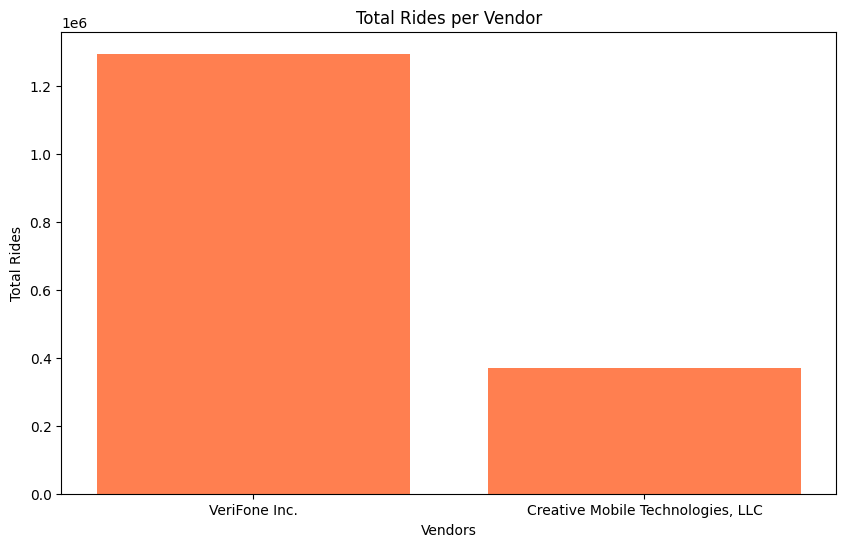

In [228]:
create_bar_plot(vendor_counts,'Total Rides per Vendor', 'Vendors', 'Total Rides', color="coral")

Only 2 vendors exist, with VeriFone doing the most number of trips.

### What is the relationship between the tip amount and the fare amount? Do higher fares mean higher tip amounts?

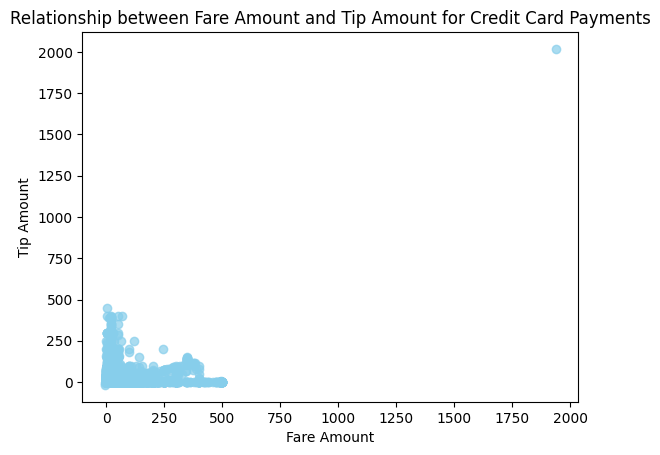

In [116]:
credit_card_payments = taxis_df[taxis_df['payment type'] == 'Credit card']
create_scatter_plot(credit_card_payments, 'fare amount', 'tip amount', 'Relationship between Fare Amount and Tip Amount for Credit Card Payments', 'Fare Amount', 'Tip Amount')

We can see from the above graph that increasing the fare amount impacts the tip amount, where higher fare amounts cause a decrease in the tip amount given. High fare amounts greater than 500 do not provide a tip at all.

### Which pick up hour of the day has the greatest fare amount?

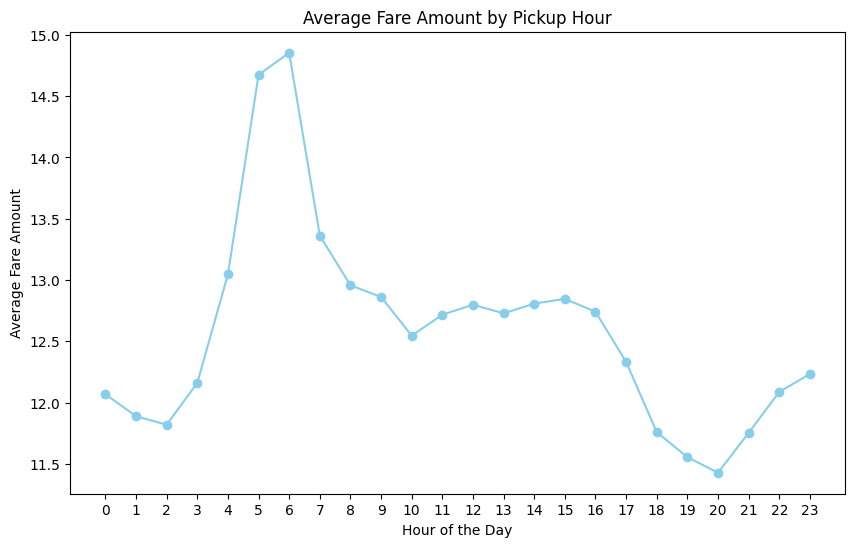

In [114]:
taxis_df_with_pickup_hour = taxis_df.copy()
taxis_df_with_pickup_hour ['lpep pickup datetime'] = pd.to_datetime(taxis_df['lpep pickup datetime']).dt.hour
hourly_fare_avg = taxis_df_with_pickup_hour.groupby('lpep pickup datetime')['fare amount'].mean()

create_line_plot(hourly_fare_avg.index, hourly_fare_avg,'Average Fare Amount by Pickup Hour', 'Hour of the Day', 'Average Fare Amount', x_ticks=range(24))


From the graph, we can see that at 6 o'clock is the peak of the average fare amount throught the 24 hours.

### How is the trip distance distributed across the table?

C:\Users\ahmed\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


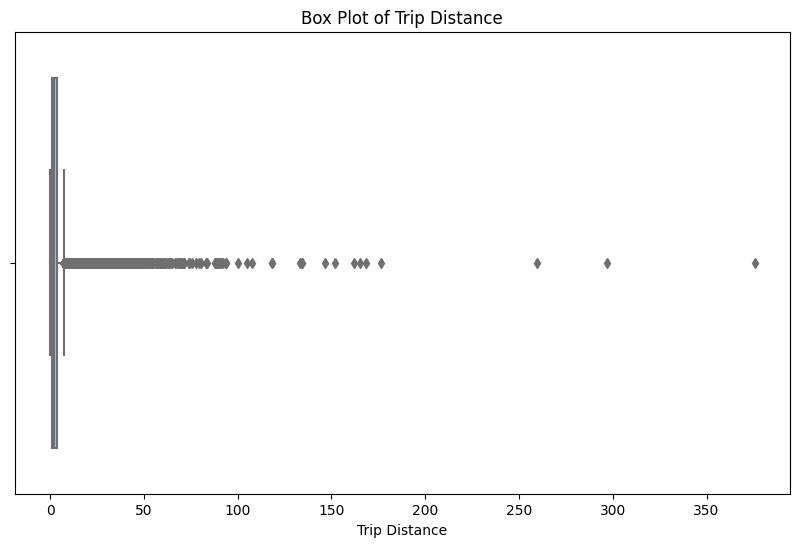

In [214]:
create_box_plot(taxis_df, 'trip distance', 'Box Plot of Trip Distance', 'Trip Distance')

C:\Users\ahmed\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ahmed\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


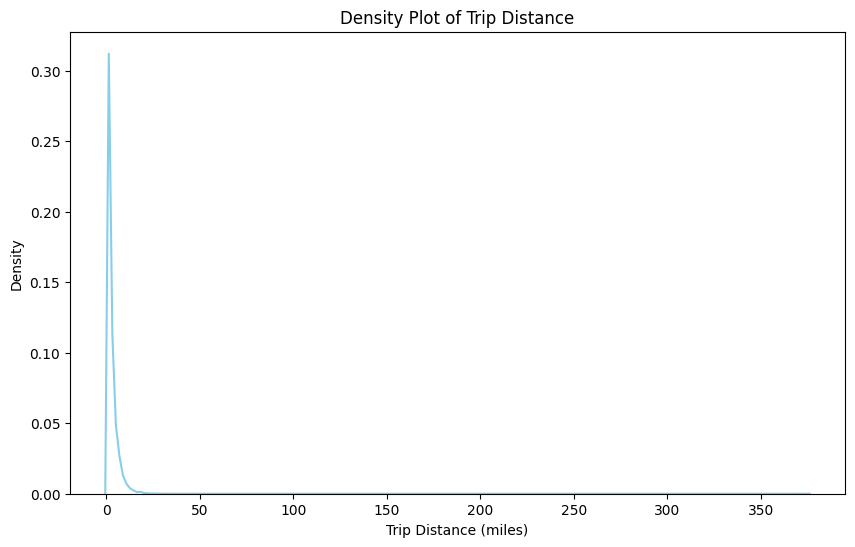

In [239]:
create_density_plot(taxis_df, 'trip distance', 'Density Plot of Trip Distance', 'Trip Distance (miles)')

From both graphs, we can see that the trip is skewed to the right and most values lie between 0-30 miles.

### Do street hails type of rides pay with cash more than credit card?

C:\Users\ahmed\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ahmed\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ahmed\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ahmed\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

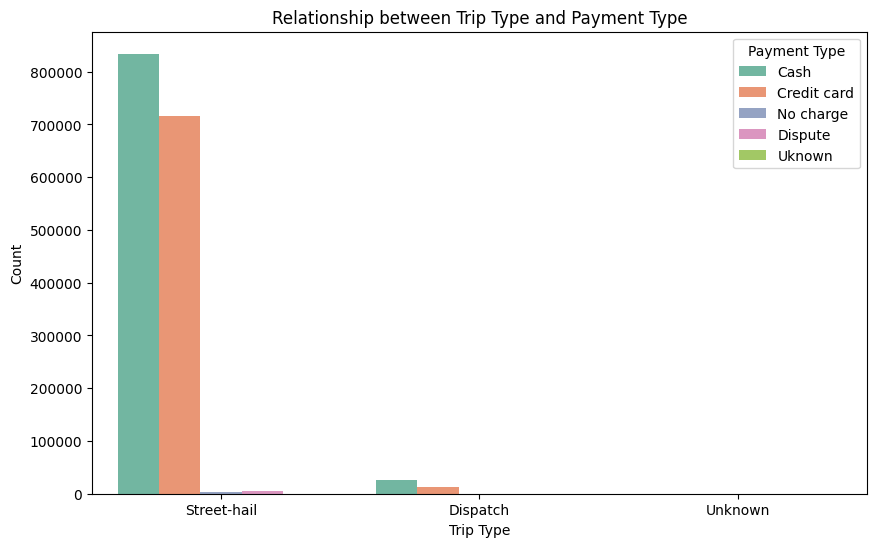

In [123]:
create_count_plot(taxis_df, 'trip type', 'payment type', 'Relationship between Trip Type and Payment Type', 'Trip Type', 'Count', 'Payment Type')

From the graph, we get to know also that there exists only 3 trip types. We can also see that Street-hail types of rides are the most popular type of ride, with cash being used more slightly than credit card. 

### What are the top 5 drop-off locations with the highest average toll amounts?

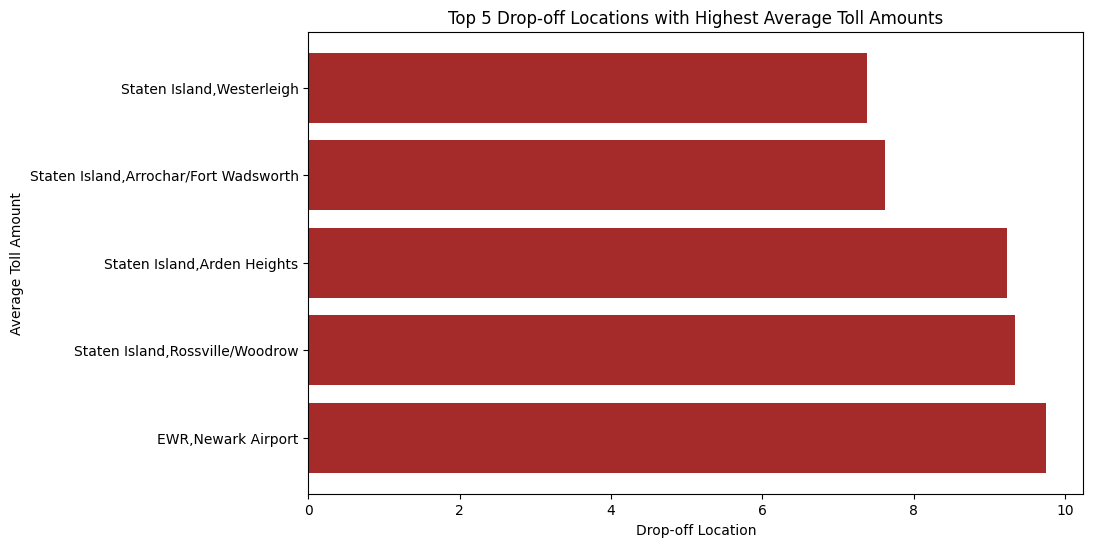

In [233]:
avg_toll_by_location = taxis_df.groupby('DO Location')['tolls amount'].mean()
avg_toll_by_location = avg_toll_by_location.sort_values(ascending=False)
top_5_locations = avg_toll_by_location.head(5)

create_bar_plot(top_5_locations, 'Top 5 Drop-off Locations with Highest Average Toll Amounts', 'Drop-off Location', 'Average Toll Amount', orientation='horizontal', color="brown")


# Cleaning Data

## Tidying up column names

In [252]:
def rename_columns(df):
    df.columns = df.columns.str.lower()
    df.columns = [col.replace(' ', '_') for col in df.columns]

In [323]:
rename_columns(taxis_df)
taxis_df.columns

Index(['vendor', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'rate_type', 'pu_location', 'do_location',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

In [256]:
taxis_df.duplicated().sum()

5

## Observe inconsistent data

In [324]:
taxis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1664404 entries, 0 to 1664403
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   vendor                 1664404 non-null  object 
 1   lpep_pickup_datetime   1664404 non-null  object 
 2   lpep_dropoff_datetime  1664404 non-null  object 
 3   store_and_fwd_flag     1664404 non-null  object 
 4   rate_type              1664404 non-null  object 
 5   pu_location            1664404 non-null  object 
 6   do_location            1664404 non-null  object 
 7   passenger_count        1663734 non-null  float64
 8   trip_distance          1664404 non-null  float64
 9   fare_amount            1664404 non-null  float64
 10  extra                  924722 non-null   float64
 11  mta_tax                1664404 non-null  float64
 12  tip_amount             1664404 non-null  float64
 13  tolls_amount           1664404 non-null  float64
 14  ehail_fee         

We can see the following inconsistencies right away:
- Passenger count is of type float, when it should be integer as it should be represented as whole numbers
- Pickup and dropoff datetimes features are represented as an object, where they could be better represented as datetime. This ensures the values in the column adhere to a consistent date and time format. Also, this allows to perform existing datetime operations easily on those columns and be able to filter them much easier.

### Converting Pick up and Drop off data type to datetime

In [274]:
def change_column_to_datetime(dataframe, column_name):
    try:
        dataframe[column_name] = pd.to_datetime(dataframe[column_name])
    except Exception as e:
                print(f"Error: Could not convert column '{column_name}' to datetime due to {e}.")

In [ ]:
change_column_to_datetime(taxis_df, 'lpep_pickup_datetime')
change_column_to_datetime(taxis_df, 'lpep_dropoff_datetime')

In [276]:
taxis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1664404 entries, 0 to 1664403
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   vendor                 1664404 non-null  object        
 1   lpep_pickup_datetime   1664404 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  1664404 non-null  datetime64[ns]
 3   store_and_fwd_flag     1664404 non-null  object        
 4   rate_type              1664404 non-null  object        
 5   pu_location            1664404 non-null  object        
 6   do_location            1664404 non-null  object        
 7   passenger_count        1663734 non-null  float64       
 8   trip_distance          1664404 non-null  float64       
 9   fare_amount            1664404 non-null  float64       
 10  extra                  924722 non-null   float64       
 11  mta_tax                1664404 non-null  float64       
 12  tip_amount             16644

Both columns data type can now be seen as 'datetime' instead of 'object'

#### Attempt to change Passenger Count column to integer

In [266]:
taxis_df.passenger_count.unique()

array([  1.,   2.,   5.,   3.,   4.,   6.,   8.,  nan, 444.,   7.,   9.])

Typecasting the values from float to integer will fail at this point because there are some missing values in the column. We will typecast it as soon as the missing values are handled in this column below.

### Duplicates

In [374]:
def copy_dataframe(dataframe):
    return dataframe.copy()
    
def find_duplicates(dataframe):
    return dataframe[dataframe.duplicated()]


In [375]:
duplicates = find_duplicates(taxis_df)
duplicates

,vendor,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
1664399,"Creative Mobile Technologies, LLC",2015-04-14 13:52:49,2015-04-14 14:02:39,N,Standard rate,"Manhattan,Central Harlem North","Manhattan,East Harlem North",1.00,1.20,8.00,NaN,0.50,0.00,0.00,NaN,0.30,8.80,NaN,Street-hail,NaN
1664400,"Creative Mobile Technologies, LLC",2015-04-19 03:11:34,2015-04-19 03:22:46,Y,Standard rate,"Brooklyn,Boerum Hill","Brooklyn,Sunset Park East",3.00,3.40,12.00,0.50,0.50,2.65,0.00,NaN,0.30,15.95,NaN,Street-hail,NaN
1664401,VeriFone Inc.,2015-04-29 22:36:01,2015-04-29 22:41:24,N,Standard rate,"Manhattan,East Harlem South","Manhattan,Yorkville West",1.00,0.78,5.50,0.50,0.50,0.00,0.00,NaN,0.30,6.80,Cash,Street-hail,NaN
1664402,"Creative Mobile Technologies, LLC",2015-04-17 13:00:16,2015-04-17 13:19:15,N,Standard rate,"Manhattan,Central Harlem","Manhattan,Yorkville East",1.00,2.60,13.50,NaN,0.50,3.00,0.00,NaN,0.30,17.30,Credit card,Street-hail,NaN
1664403,VeriFone Inc.,2015-04-09 01:38:38,2015-04-09 01:43:35,N,Standard rate,"Bronx,Fordham South","Bronx,Claremont/Bathgate",1.00,1.23,6.00,0.50,0.50,0.00,0.00,NaN,0.30,7.30,Credit card,Street-hail,NaN


In [361]:
duplicates.shape

(5, 20)

We can see that we have 5 duplicates in our dataset. It's very hard to have 2 identical rows exactly in our dataset, as this implies that there exists 2 rides with the same exact vendor, pickup time and location as well as dropoff location along with passenger count and tip amount. It is very highly unlikely that those 2 rides happened concurrently at the same time and under the same exact conditions. Hence, those rows are marked as duplicates and should be removed.

A copy of the dataframe is first created to be used for performing our cleaning operations on.

In [369]:
taxis_df_cleaned = copy_dataframe(taxis_df)
taxis_df_cleaned.head()

,vendor,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,"Creative Mobile Technologies, LLC",2015-04-01 00:26:00,2015-04-01 00:27:14,N,Standard rate,"Queens,Long Island City/Hunters Point","Queens,Long Island City/Hunters Point",1.00,8.30,3.00,0.50,0.50,0.00,0.00,NaN,0.30,4.30,Cash,Street-hail,NaN
1,VeriFone Inc.,2015-04-01 00:17:41,2015-04-01 00:19:45,N,Standard rate,"Queens,Long Island City/Queens Plaza","Queens,Long Island City/Queens Plaza",1.00,0.00,3.50,0.50,0.50,0.00,0.00,NaN,0.30,4.80,Cash,Street-hail,NaN
2,VeriFone Inc.,2015-04-01 00:01:25,2015-04-01 00:11:22,N,Standard rate,"Brooklyn,Williamsburg (North Side)","Manhattan,Alphabet City",1.00,2.41,10.00,0.50,0.50,2.26,0.00,NaN,0.30,13.56,Credit card,Street-hail,NaN
3,VeriFone Inc.,2015-04-01 00:30:16,2015-04-01 00:55:27,N,Standard rate,"Brooklyn,Williamsburg (North Side)","Manhattan,Times Sq/Theatre District",1.00,6.17,21.50,0.50,0.50,4.56,0.00,NaN,0.30,27.36,Credit card,Street-hail,NaN
4,VeriFone Inc.,2015-04-01 00:19:05,2015-04-01 00:39:33,N,Standard rate,"Brooklyn,East Williamsburg","Manhattan,Clinton East",1.00,6.51,21.00,0.50,0.50,3.00,0.00,NaN,0.30,25.30,Credit card,Street-hail,NaN


In [371]:
taxis_df_cleaned = taxis_df_cleaned.drop_duplicates()
taxis_df_cleaned.head()

,vendor,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,"Creative Mobile Technologies, LLC",2015-04-01 00:26:00,2015-04-01 00:27:14,N,Standard rate,"Queens,Long Island City/Hunters Point","Queens,Long Island City/Hunters Point",1.00,8.30,3.00,0.50,0.50,0.00,0.00,NaN,0.30,4.30,Cash,Street-hail,NaN
1,VeriFone Inc.,2015-04-01 00:17:41,2015-04-01 00:19:45,N,Standard rate,"Queens,Long Island City/Queens Plaza","Queens,Long Island City/Queens Plaza",1.00,0.00,3.50,0.50,0.50,0.00,0.00,NaN,0.30,4.80,Cash,Street-hail,NaN
2,VeriFone Inc.,2015-04-01 00:01:25,2015-04-01 00:11:22,N,Standard rate,"Brooklyn,Williamsburg (North Side)","Manhattan,Alphabet City",1.00,2.41,10.00,0.50,0.50,2.26,0.00,NaN,0.30,13.56,Credit card,Street-hail,NaN
3,VeriFone Inc.,2015-04-01 00:30:16,2015-04-01 00:55:27,N,Standard rate,"Brooklyn,Williamsburg (North Side)","Manhattan,Times Sq/Theatre District",1.00,6.17,21.50,0.50,0.50,4.56,0.00,NaN,0.30,27.36,Credit card,Street-hail,NaN
4,VeriFone Inc.,2015-04-01 00:19:05,2015-04-01 00:39:33,N,Standard rate,"Brooklyn,East Williamsburg","Manhattan,Clinton East",1.00,6.51,21.00,0.50,0.50,3.00,0.00,NaN,0.30,25.30,Credit card,Street-hail,NaN


Let's make sure the duplicates were actually removed.

In [376]:
duplicates = find_duplicates(taxis_df_cleaned)
duplicates

,vendor,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge


### Negative Values in Columns

Some columns in our dataset contain negative numbers, but are they actually allowed in our context of a taxis dataset? Let's check first what columns in our dataset have negative values.

In [455]:
def columns_with_negatives(df):
    numeric_columns = df.select_dtypes(include=['int', 'float'])
    columns_with_negatives = numeric_columns.columns[(numeric_columns < 0).any()]
    return columns_with_negatives
    
def min_of_columns(df, columns_list):
    if isinstance(columns_list, pd.Index):
        columns_list = columns_list.to_list()
    min_values = tuple(df[col].min() for col in columns_list)
    return min_values

def count_records_with_negatives(df, columns_with_negatives):
    num_records_with_negatives = (df[columns_with_negatives] <0).any(axis=1).sum()
    return num_records_with_negatives

def delete_records_with_negatives(df, columns_with_negatives):
    df_cleaned = df[~(df[columns_with_negatives] < 0).any(axis=1)]
    return df_cleaned

In [444]:
columns_with_negatives = columns_with_negatives(taxis_df_cleaned)
columns_with_negatives


Index(['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')

We can also verify that those values contain negative values by printing the min value of those columns. They should be all be less than zero.

In [446]:
min_of_columns(taxis_df_cleaned, columns_with_negatives)

(-499.0, -1.0, -0.5, -52.0, -9.75, -0.3, -499.0)

However in the context of a taxis dataset that records information about trip rides, negatives values in monetary columns are not typical. It's uncommon to have negative amounts or charges in the real-world taxi industry. Those negatives values are be indicative of data quality issues, errors, or anomalies in our dataset. Hence, those rows should be all removed to have a consistent and correct dataset.

In [456]:
count_negative_records = count_records_with_negatives(taxis_df_cleaned, columns_with_negatives)
count_negative_records

2425

In [453]:
taxis_df_cleaned = delete_records_with_negatives(taxis_df_cleaned, columns_with_negatives)

In [448]:
min_of_columns(taxis_df_cleaned, columns_with_negatives)

(0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0)

We can see that after removing the 2425 rows with negative values in any of the monetary columns, when we get the min of each of those rows we get a value greater or equal to 0. This proves that the records were actually deleted.

In [464]:
taxis_df_cleaned[taxis_df_cleaned.fare_amount==0]

,vendor,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
311,"Creative Mobile Technologies, LLC",2015-04-01 00:46:12,2015-04-01 00:52:32,N,Negotiated fare,"Bronx,Morrisania/Melrose","Bronx,Hunts Point",1.00,1.30,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,Cash,Dispatch,NaN
404,"Creative Mobile Technologies, LLC",2015-04-01 00:30:51,2015-04-01 00:41:53,N,Negotiated fare,"Unknown,NV","Manhattan,Hamilton Heights",1.00,2.10,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,No charge,Dispatch,NaN
587,"Creative Mobile Technologies, LLC",2015-04-01 00:05:16,2015-04-01 00:38:15,N,Negotiated fare,"Manhattan,East Harlem North","Manhattan,Inwood",1.00,6.80,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,NaN,Dispatch,NaN
588,"Creative Mobile Technologies, LLC",2015-04-01 00:59:42,2015-04-01 02:43:06,N,Negotiated fare,"Manhattan,East Harlem North","Manhattan,East Harlem North",1.00,13.50,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,NaN,Dispatch,NaN
1663,VeriFone Inc.,2015-04-01 00:31:42,2015-04-01 00:32:04,N,Standard rate,"Queens,Long Island City/Queens Plaza","Queens,Long Island City/Queens Plaza",1.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.30,0.00,Credit card,Street-hail,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661314,"Creative Mobile Technologies, LLC",2015-04-30 22:27:17,2015-04-30 22:38:18,N,Negotiated fare,"Manhattan,Washington Heights South","Manhattan,Central Harlem North",2.00,3.00,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,NaN,Dispatch,NaN
1661448,"Creative Mobile Technologies, LLC",2015-04-30 23:55:10,2015-05-01 00:02:53,N,Negotiated fare,"Manhattan,Central Harlem North","Manhattan,Central Harlem",1.00,1.50,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,Cash,Dispatch,NaN
1661848,"Creative Mobile Technologies, LLC",2015-04-30 23:09:05,2015-04-30 23:18:23,N,Negotiated fare,"Bronx,Highbridge","Bronx,West Concourse",NaN,1.00,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,Cash,Dispatch,NaN
1662185,"Creative Mobile Technologies, LLC",2015-04-30 23:17:44,2015-04-30 23:30:57,N,Negotiated fare,"Bronx,Highbridge","Bronx,University Heights/Morris Heights",1.00,2.30,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,Cash,Dispatch,NaN


In [485]:
taxis_df_cleaned.rate_type.value_counts()

rate_type
Standard rate            1614269
Negotiated fare            40970
JFK                         4644
Newark                      1304
Nassau or Westchester        736
Group ride                    54
Unknown                        2
Name: count, dtype: int64

,vendor,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
311,"Creative Mobile Technologies, LLC",2015-04-01 00:46:12,2015-04-01 00:52:32,N,Negotiated fare,"Bronx,Morrisania/Melrose","Bronx,Hunts Point",1.00,1.30,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,Cash,Dispatch,NaN
404,"Creative Mobile Technologies, LLC",2015-04-01 00:30:51,2015-04-01 00:41:53,N,Negotiated fare,"Unknown,NV","Manhattan,Hamilton Heights",1.00,2.10,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,No charge,Dispatch,NaN
587,"Creative Mobile Technologies, LLC",2015-04-01 00:05:16,2015-04-01 00:38:15,N,Negotiated fare,"Manhattan,East Harlem North","Manhattan,Inwood",1.00,6.80,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,NaN,Dispatch,NaN
588,"Creative Mobile Technologies, LLC",2015-04-01 00:59:42,2015-04-01 02:43:06,N,Negotiated fare,"Manhattan,East Harlem North","Manhattan,East Harlem North",1.00,13.50,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,NaN,Dispatch,NaN
1663,VeriFone Inc.,2015-04-01 00:31:42,2015-04-01 00:32:04,N,Standard rate,"Queens,Long Island City/Queens Plaza","Queens,Long Island City/Queens Plaza",1.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.30,0.00,Credit card,Street-hail,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661314,"Creative Mobile Technologies, LLC",2015-04-30 22:27:17,2015-04-30 22:38:18,N,Negotiated fare,"Manhattan,Washington Heights South","Manhattan,Central Harlem North",2.00,3.00,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,NaN,Dispatch,NaN
1661448,"Creative Mobile Technologies, LLC",2015-04-30 23:55:10,2015-05-01 00:02:53,N,Negotiated fare,"Manhattan,Central Harlem North","Manhattan,Central Harlem",1.00,1.50,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,Cash,Dispatch,NaN
1661848,"Creative Mobile Technologies, LLC",2015-04-30 23:09:05,2015-04-30 23:18:23,N,Negotiated fare,"Bronx,Highbridge","Bronx,West Concourse",NaN,1.00,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,Cash,Dispatch,NaN
1662185,"Creative Mobile Technologies, LLC",2015-04-30 23:17:44,2015-04-30 23:30:57,N,Negotiated fare,"Bronx,Highbridge","Bronx,University Heights/Morris Heights",1.00,2.30,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,Cash,Dispatch,NaN


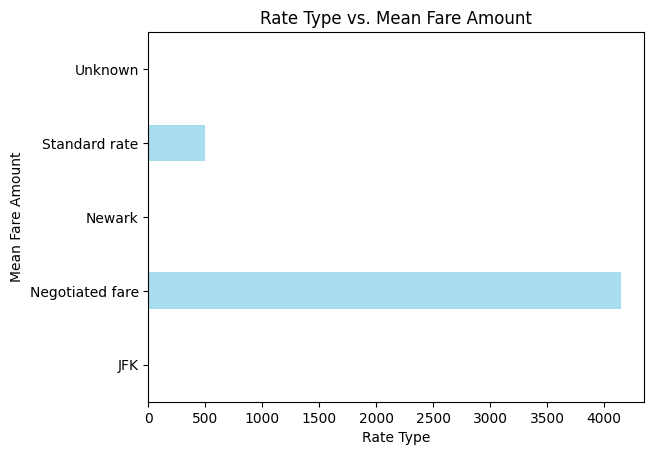

In [483]:
fare_zero_df = taxis_df_cleaned[taxis_df_cleaned['total_amount']==0]
rate_fare_mean = fare_zero_df.groupby('rate_type')['total_amount'].count()

rate_fare_mean.plot(kind='barh', color='skyblue', alpha=0.7)
plt.title('Rate Type vs. Mean Fare Amount')
plt.xlabel('Rate Type')
plt.ylabel('Mean Fare Amount')
fare_zero_df

## Observing Missing Data

In [278]:
perc_null_mean = taxis_df.isnull().mean()*100
perc_null_mean

vendor                    0.00
lpep_pickup_datetime      0.00
lpep_dropoff_datetime     0.00
store_and_fwd_flag        0.00
rate_type                 0.00
pu_location               0.00
do_location               0.00
passenger_count           0.04
trip_distance             0.00
fare_amount               0.00
extra                    44.44
mta_tax                   0.00
tip_amount                0.00
tolls_amount              0.00
ehail_fee               100.00
improvement_surcharge     0.00
total_amount              0.00
payment_type              4.00
trip_type                 0.00
congestion_surcharge    100.00
dtype: float64


We could observe that:
- "ehail_fee" and "congestion_surcharge" are completely missing.
- Passenger count have few records that are missing, with a low percentage of 0.04%
- In the "extra" column, almost half of the entries are missing with a percentage of 44.44%
- Payment type column also have about 4% of the entries missing.

## Handling Missing data

### Helper Handler Functions for Missing Data

In [353]:
def drop_columns(dataframe, columns_to_drop):
    cleaned_dataframe = dataframe.drop(columns_to_drop, axis=1)
    return cleaned_dataframe

def impute_with_median(dataframe, column_name, inplace=True):
    median_value = dataframe[column_name].median()
    dataframe[column_name].fillna(median_value, inplace=inplace)
    return dataframe

def impute_with_mode(dataframe, column_name, inplace=True):
    mode_value = dataframe[column_name].mode()[0] 
    dataframe[column_name].fillna(mode_value, inplace=inplace)
    return dataframe

def impute_with_value(dataframe, column_name, impute_value, inplace=True):
    dataframe[column_name].fillna(impute_value, inplace=inplace)
    return dataframe

def replace_missing_value(dataframe, value_to_replace):
    return dataframe.replace(value_to_replace, np.nan)


### Ehail Fee and Congestion Surcharge handling

Since those columns are completely missing from the table, a good option is to omit both columns entirely from our table. 
Imputation methods like mean, median, mode, or specific value imputation are not a valid way to handle the missing values in those columns as they require existing data values within the column to calculate and replace missing values. When a column is entirely missing, there are no values to calculate statistics from, making imputation impossible. Also, we can't also delete the records where this field is missing as we be deleting the entire table in this case.

In [325]:
taxis_df_cleaned = drop_columns(taxis_df, ['ehail_fee', 'congestion_surcharge'])
taxis_df_cleaned.columns

Index(['vendor', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'rate_type', 'pu_location', 'do_location',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type'],
      dtype='object')

### Passenger Count handling

Deleting the rows where passenger count is null or empty is an option, but other features/columns in the rest of the row will be emitted and lost. Instead,the values will be imputed for passenger count column since the missingness in it is relatively low.
Let's check first if we will use the mean or median depending on the skewiness of it.

In [311]:
taxis_df_cleaned.passenger_count.min(),\
taxis_df_cleaned.passenger_count.max(),\
taxis_df_cleaned.passenger_count.skew()

(1, 444, 119.27529764273699)

Based on the result shown above, the graph is positively skewed, and hence a median is a better choice for filling the missing values as the mean gets affected by skewiness and outliers which wouldn't be a good option in this case.

In [326]:
taxis_df_cleaned = impute_with_median(taxis_df_cleaned, 'passenger_count')

#### Check that passenger count contains no missing values.

In [327]:
unique_passenger_count_values = taxis_df_cleaned['passenger_count'].unique()
unique_passenger_count_values

array([  1.,   2.,   5.,   3.,   4.,   6.,   8., 444.,   7.,   9.])

In [328]:
sum_passenger_count = taxis_df_cleaned['passenger_count'].isna().sum()
sum_passenger_count

0

We can see that the passenger count has been cleaned successfully. The count of missing values is 0 and NaN doesn't exist within the column's unique values.

#### Typecast Passenger Count column into integer instead of float for data to be consistent

In [329]:
taxis_df_cleaned['passenger_count'] = taxis_df_cleaned.passenger_count.astype(int)

In [351]:
taxis_df_cleaned.passenger_count.dtype

dtype('int32')

### Payment Type handling

Similar to the passenger count, the value will be imputed. Since the field is categorical, we'll choose to impute using the mode as there are no numerical data to impute with median or mode.

In [352]:
taxis_df_cleaned.payment_type.mode()

0    Cash
Name: payment_type, dtype: object

In [336]:
taxis_df_cleaned.payment_type.value_counts()

payment_type
Cash           859237
Credit card    729346
Dispute          4684
No charge        4422
Uknown             67
Name: count, dtype: int64

We can see that there is a value "Uknown" in the payments type column, which can also be considered as missing. Before imputing, we will convert this value to a missing value recognizable by pandas, so that this value is imputed as well.

In [343]:
taxis_df_cleaned = replace_missing_value(taxis_df_cleaned,'Uknown')
print(taxis_df_cleaned.payment_type.value_counts())
print(taxis_df_cleaned.payment_type.unique())

payment_type
Cash           925885
Credit card    729346
Dispute          4684
No charge        4422
Name: count, dtype: int64
['Cash' 'Credit card' 'No charge' 'Dispute' nan]


'Uknown' has been removed and replaced with NaN instead as shown above.

In [344]:
taxis_df_cleaned = impute_with_mode(taxis_df_cleaned, 'payment_type')

#### Check that payment type contains no missing values.

In [345]:
unique_payment_type_values = taxis_df_cleaned['payment_type'].unique()
unique_payment_type_values

array(['Cash', 'Credit card', 'No charge', 'Dispute'], dtype=object)

In [346]:
sum_payment_type = taxis_df_cleaned['payment_type'].isna().sum()
sum_payment_type

0

We can see that the payment type has been cleaned successfully. The count of missing values is 0 and NaN as well 'Uknown' do not exist within the column's unique values.

However imputing all values as 'Cash' only may not be very accurate in our case as based on the description, if a tip amount exists, then the payment type must be credit card. As a solution, we'll convert any row with a non-zero tip amount into 'Credit card'.

In [348]:
taxis_df_cleaned.loc[taxis_df_cleaned['tip_amount'] > 0, 'payment_type'] = 'Credit card'

Let's verify that there doesn't exist now any row with a non-zero tip amount and with a different payment type than 'Credit card'.

In [350]:
non_zero_tip_and_not_credit_card = taxis_df_cleaned[
    (taxis_df_cleaned['tip_amount'] > 0) & (taxis_df_cleaned['payment_type'] != 'Credit card')
]
len(non_zero_tip_and_not_credit_card)

0

### Extra Column handling

This column has a relatively high percentage of 44.44%. The reason why it is this high is because maybe many of the trips don't need to include an extra charge on the passenger. As a solution to that, it's logical to assign a value of 0 when it is missing.

In [354]:
taxis_df_cleaned = impute_with_value(taxis_df_cleaned, 'extra', 0)

Let's verify that the extra column was actually cleaned and doesn't contain any missing values.

In [356]:
taxis_df_cleaned.extra.unique()

array([ 0.5 , -0.5 ,  0.  ,  1.  , -1.  ,  5.  , 16.  ,  0.25])

In [355]:
taxis_df_cleaned.extra.isna().sum()

0

### Final check across all columns that data is cleaned

In [358]:
taxis_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1664404 entries, 0 to 1664403
Data columns (total 18 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   vendor                 1664404 non-null  object 
 1   lpep_pickup_datetime   1664404 non-null  object 
 2   lpep_dropoff_datetime  1664404 non-null  object 
 3   store_and_fwd_flag     1664404 non-null  object 
 4   rate_type              1664404 non-null  object 
 5   pu_location            1664404 non-null  object 
 6   do_location            1664404 non-null  object 
 7   passenger_count        1664404 non-null  int32  
 8   trip_distance          1664404 non-null  float64
 9   fare_amount            1664404 non-null  float64
 10  extra                  1664404 non-null  float64
 11  mta_tax                1664404 non-null  float64
 12  tip_amount             1664404 non-null  float64
 13  tolls_amount           1664404 non-null  float64
 14  improvement_surcha

We can see that number of non-null entries in each column is equal to the number of records in our table.

## Observing outliers

## Handling outliers

## Findings and conclusions

# Data transformation and feature eng.

## 4.1 - Discretization

## 4.11 - Findings and conclusions

## 4.2 - Encoding

## 4.22 - Findings and conlcusions

## 4.3 - Normalisation 

## 4.31 - Findings and conclusions

## 4.4 - Adding more features(feature eng.)

## 4.41 - Findings and concluisons

## 4.5 - Additional data extraction (GPS coordinates)

## 4.6 - Csv file for lookup

## 5- Exporting the dataframe to a csv file or parquet

In [ ]:
df_stack_overflow.to_csv(data_dir + 'survey_results_clean.csv',index=False)